In [25]:
import sys
# sys.path.insert(0, '../../')
import rasterio
import numpy as np
from pathlib import Path
import rioxarray
import rasterio

In [2]:
%load_ext autoreload

In [3]:
RASTER_PATH = Path("../../data/geolifeclef-2022")
# RASTER_PATH = "s3://datasets-sdm/geoLifeCLEF/rasters/"

BUCKET_NAME = 'datasets-sdm'
folder = 'geoLifeCLEF/rasters'
s3_raster_path = 's3://{}/{}/'.format(BUCKET_NAME, folder)

In [3]:
%autoreload 2
from environmental_raster import PatchExtractor

UsageError: Line magic function `%autoreload` not found.


## Test stuff -- ignore

In [200]:
filename = s3_raster_path + "{}/{}_{}.tif".format("bio_11", "bio_11", "USA")
# filename = s3_raster_path + "{}/{}_{}.tif".format("cecsol", "cecsol", "USA")

MIN_ALLOWED_VALUE = -10000
nan = None

# with rasterio.vrt.WarpedVRT(filename, crs="EPSG:32610") as src:
#     # self.dataset = dataset
#     raster = dataset.read(1, masked=True, out_dtype=np.float32)
src = rasterio.open(filename, nodata=nan)

x_min = src.bounds.left
y_min = src.bounds.bottom
x_resolution = src.res[0]
y_resolution = src.res[1]
n_rows = src.height
n_cols = src.width

# loading the raster
raster = np.squeeze(src.read())
src.close()

raster = raster.astype(float)

# value bellow min_value are considered incorrect and therefore no_data
raster[raster < MIN_ALLOWED_VALUE] = None
raster[np.isnan(raster)] = None
#convert to 0-255, and then to uint8
raster = (255 * (raster - np.nanmin(raster)) / (np.nanmax(raster) - np.nanmin(raster))).astype(np.uint8)
raster

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
np.nanmax(raster), np.nanmin(raster), np.nanstd(raster), np.nanmean(raster)

(255, 0, 62.41662445487879, 40.128194853020986)

(array([[3237.,    0.,    0., ...,    0.,    0.,    0.],
        [3236.,    0.,    0., ...,    0.,    0.,    0.],
        [3234.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [2820.,  113.,  268., ...,    0.,    0.,    0.],
        [2829.,  110.,  266., ...,    0.,    0.,    0.],
        [2828.,  111.,  266., ...,    0.,    0.,    0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 7200 BarContainer objects>)

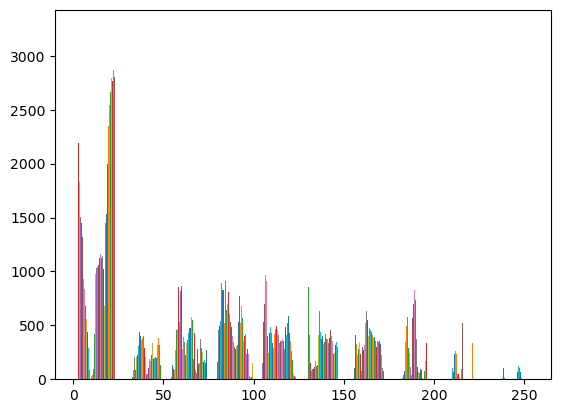

In [202]:
plt.hist(raster)

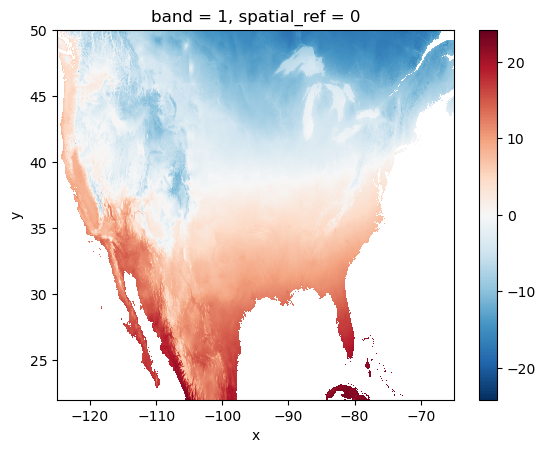

In [34]:
rds = None
filename = s3_raster_path + "{}/{}_{}.tif".format("bio_11", "bio_11", "USA")
with rasterio.Env():
    with rasterio.open(filename, "r") as src:
        with rasterio.vrt.WarpedVRT(src, crs="EPSG:4326") as vrt:
            rds = rioxarray.open_rasterio(vrt, masked=True)
            # rds = rds.rio.reproject("EPSG:32610", nodata=None)
            rds.sel(band=1).plot.imshow()
            
        

<xarray.DataArray (band: 1, y: 22036, x: 31441)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 2.936e+05 2.939e+05 ... 7.275e+06 7.275e+06
  * y            (y) float64 7.326e+06 7.326e+06 ... 2.433e+06 2.433e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  385
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0


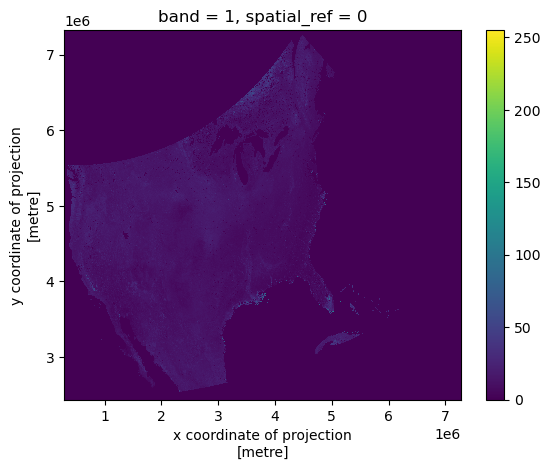

In [5]:
raster = None
filename = s3_raster_path + "{}/{}_{}.tif".format("cecsol", "cecsol", "USA")
# filename = s3_raster_path + "{}/{}_{}.tif".format("bio_4", "bio_4", "USA")
dst_crs = 'EPSG:32610'

with rasterio.Env():
    with rasterio.open(filename, "r") as f:

        raster = rioxarray.open_rasterio(f, masked=True)#.rio.clip([mask_geom], from_disk=True)
        raster = raster.rio.reproject(dst_crs)

print(raster)
#convert to 0-255, and then to uint8
raster.data = (255 * (raster.data - np.nanmin(raster.data)) / (np.nanmax(raster.data) - np.nanmin(raster.data))).astype(np.uint8)
# raster.data = raster.data.filled(0)
raster.sel(band=1).plot.imshow()

In [20]:
len(raster.band)

1

In [7]:
raster.values.mean(), raster.values.std()

(4.459760700269223, 6.987447917277084)

In [126]:
import shapely
point_geom = shapely.geometry.mapping(shapely.geometry.Point(berkeley))
point_geom

AttributeError: module 'shapely' has no attribute 'geometry'

In [31]:
import IPython
import torch
import torchvision.transforms as T

to_pil = T.ToPILImage()


t = torch.from_numpy(raster)
display = to_pil(t)
    

In [50]:
display.show()

## Using PatchExtractor

In [34]:
50000/(111.11 *1000)

0.4500045000450005

In [46]:
import shapely.geometry

dst_crs = 'epsg:32610'
side_len_m = 50000
side_len = side_len_m / (111.11 * 1000)
buf = 0.1 # to take care of warping issues
berkeley = (-122.240558, 37.90588)
point_geom = shapely.geometry.mapping(shapely.geometry.Point(berkeley))

# Grid points are in 4326 -> move to 32610
# point_geom = rasterio.warp.transform_geom("epsg:4326", dst_crs, point_geom)
# point_geom = rasterio.warp.transform_geom(self.crs, dst_crs, point_geom)

#Convert the point to a shape
point_shape = shapely.geometry.shape(point_geom)
#Create a square out of it with side_length = buffer*2
mask_shape = point_shape.buffer(side_len * (1+buf)).envelope
# mask_shape = point_shape.buffer(0.025).envelope
mask_geom = shapely.geometry.mapping(mask_shape)
mask_geom

{'type': 'Polygon',
 'coordinates': (((-122.7355629500495, 37.410875049950505),
   (-121.74555304995049, 37.410875049950505),
   (-121.74555304995049, 38.4008849500495),
   (-122.7355629500495, 38.4008849500495),
   (-122.7355629500495, 37.410875049950505)),)}

In [39]:
local_path = "../../data/geolifeclef-2022/rasters/cecsol/cecsol_USA.tif"
with rasterio.Env():
    with rasterio.open(local_path, "r") as f:
            # rds = rioxarray.open_rasterio(f, bbox=mask_geom['coordinates'], crop=True)
            rds = rioxarray.open_rasterio(f,masked=True)
            

In [40]:
r = rds.rio.clip([mask_geom], from_disk=True)
aoi = r.rio.reproject(dst_crs)

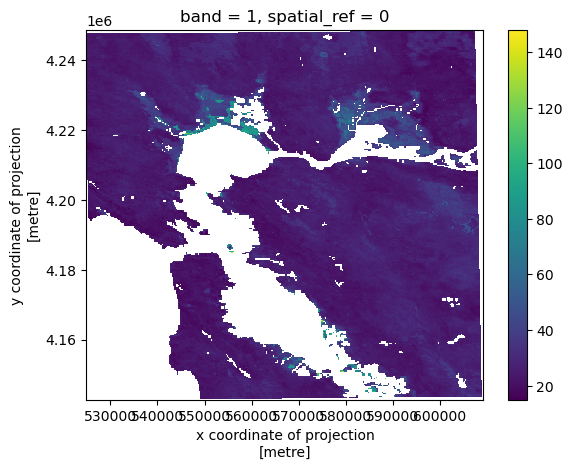

In [41]:
aoi.plot()

In [72]:
aoi.values.shape, aoi.rio.crs.data, rds.rio.crs.data

((1, 508, 404), {'init': 'epsg:32610'}, {'init': 'epsg:4326'})

In [44]:
aoi.data = (255 * (aoi.data - np.nanmin(aoi.data)) / (np.nanmax(aoi.data) - np.nanmin(aoi.data)))

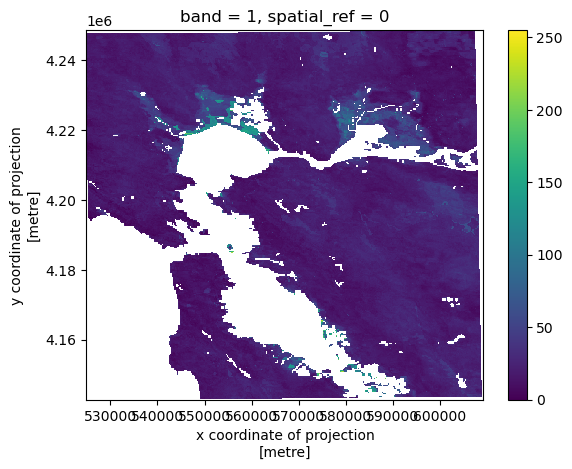

In [45]:
aoi.plot()

In [66]:
import torch
import torchvision.transforms as T

side_px = 512
#Now do a center-crop for less than the smaller size by buf
t = torch.from_numpy(aoi.values.astype(np.uint8))

smallest_side = min(t.shape[1:3]) #for 3d tensor

crop_size = int(smallest_side * (1-buf))
postprocess = T.Compose ([T.CenterCrop((crop_size)),
                                     T.Resize((side_px,side_px))])

t = postprocess(t)

In [67]:
t.shape

torch.Size([1, 512, 512])

In [68]:
import IPython
import torch
import torchvision.transforms as T

to_pil = T.ToPILImage()

display = to_pil(t)
# display.show()
display.save('test.png')

In [31]:
import gc
del rds, r, aoi
gc.collect()

491

In [165]:

BUCKET_NAME = 'datasets-sdm'
folder = 'geoLifeCLEF/rasters'
s3_raster_path = 's3://{}/{}/'.format(BUCKET_NAME, folder)

In [75]:
%autoreload 2
from environmental_raster import PatchExtractor


In [76]:
print(s3_raster_path)
extractor = PatchExtractor(s3_raster_path, side_len_m=5000, side_px=512)
# extractor = PatchExtractor(RASTER_PATH, side_len_m=50000, side_px=256)
extractor.append("bio_1", display=False)
extractor.append("bio_12")
extractor.append("cecsol", display=False)
extractor.append("phihox", display=False)
# extractor.add_all_rasters()


s3://datasets-sdm/geoLifeCLEF/rasters/
Opening Raster file for  bio_1
Completed Setup of Raster bio_1 in CRS = EPSG:4326 and dtype float32
Opening Raster file for  bio_12
Completed Setup of Raster bio_12 in CRS = EPSG:4326 and dtype float32
Opening Raster file for  cecsol
Completed Setup of Raster cecsol in CRS = EPSG:4326 and dtype float32
Opening Raster file for  phihox
Completed Setup of Raster phihox in CRS = EPSG:4326 and dtype float32


In [77]:
extractor.append("cecsol", display=False)
extractor.append("phihox", display=False)

Opening Raster file for  cecsol
Completed Setup of Raster cecsol in CRS = EPSG:4326 and dtype float32
Opening Raster file for  phihox
Completed Setup of Raster phihox in CRS = EPSG:4326 and dtype float32


In [79]:
# patch = extractor[ -124.36556, 40.23088]
# berkeley = (-122.2629862, 37.8879003)
berkeley = (-122.240558, 37.90588)
crs = 'EPSG:32610'
coordinates = (berkeley, crs)
# coordinates = ((-124.36556, 40.23088), crs)
patch = extractor[coordinates]
# coordinates[0][1]

EPSG:32610 -122.240558 37.90588


NoDataInBounds: No data found in bounds.

In [194]:
patch.shape, type(patch)

((4, 512, 512), numpy.ndarray)

In [193]:
patch

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [188]:
patch.max(), patch.min(), patch.std()

(254, 0, 68.01887342370105)

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.3)
# plt.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for i in range (patch.shape[0]):
    RGB_image = patch[i].unsqueeze(dim=0) * 3 #-> Fake convert to RGB
    # add a new subplot iteratively
    ax = plt.subplot(patch.shape[0], 1, i + 1)
    ax.imshow(RGB_image.permute(1, 2, 0))
    ax.axis('off')

NameError: name 'patch' is not defined

<Figure size 1500x1000 with 0 Axes>

In [203]:
import IPython
import torch
import torchvision.transforms as T

to_pil = T.ToPILImage()


t = torch.from_numpy(patch[3,:,:])
display = to_pil(t)
# display.show()
display.save('test.png')

TypeError: Invalid shape (3, 256, 256) for image data

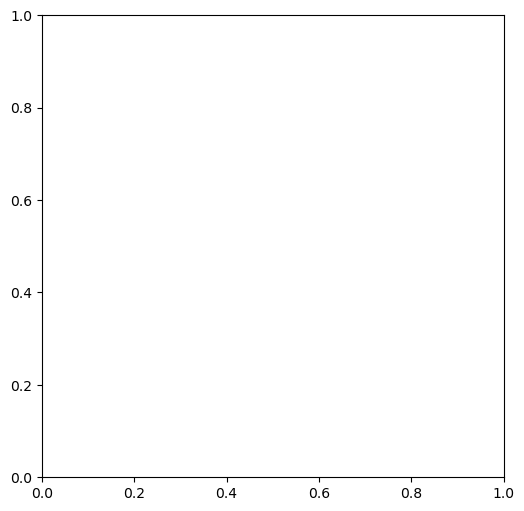

In [162]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
plt.imshow(patch)
extractor.plot((berkeley), fig=fig)

In [204]:
del extractor, patch

import gc
gc.collect()

613